### Importing the libraries


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

### Review data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


### Split data into the independent vs dependent variables

In [4]:
X = df.iloc[:,[2,3]].values
y = df.iloc[:,-1].values

### Split data into train and test sets

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state = 0)

### Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc_X = StandardScaler()

In [10]:
X_train = sc_X.fit_transform(X_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
X_test = sc_X.fit_transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Fitting Random Forest Classification  Model to train dataset

In [12]:
from sklearn.ensemble import RandomForestClassifier

We use Entropy index to choose the root note:

In [13]:
classifier = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)

In [14]:
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Predicting the Test set results

In [15]:
y_pred =  classifier.predict(X_test)

### Making the confusion matrix

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
cm = confusion_matrix(y_test,y_pred)

In [18]:
cm

array([[63,  5],
       [ 5, 27]])

|  Predicted \Actual Values| 1 | 0 |
| --- | --- | --- |
| 1 | TP =64 | FP =4 |
| 0 | FN = 5 | TN = 27 |


### Visualising the  Training set results

In [19]:
from matplotlib.colors import ListedColormap

In [20]:
X_set, y_set = X_train, y_train

In [21]:
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step = 0.01),\
                        np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step = 0.01))

(-2.5825424477554764, 3.3274575522443977)

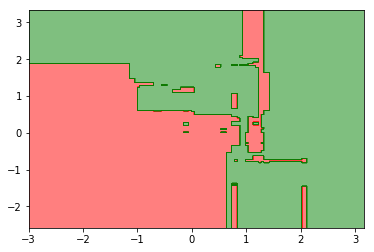

In [22]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()] ).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

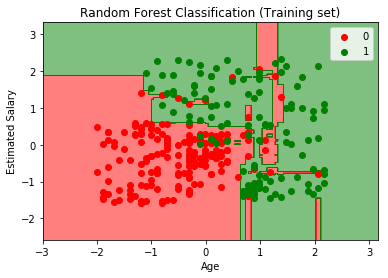

In [26]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()] ).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1],
                c = ListedColormap(('red','green'))(i),label =j  )
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the Test set results

In [22]:
from matplotlib.colors import ListedColormap

In [23]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step = 0.01),\
                        np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step = 0.01))

(-2.5825424477554764, 3.3274575522443977)

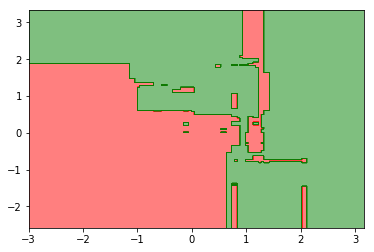

In [24]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()] ).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

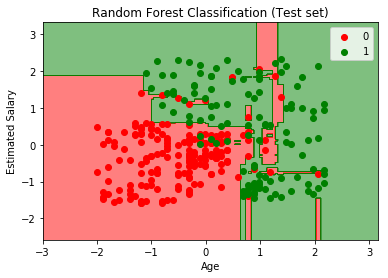

In [27]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()] ).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1],
                c = ListedColormap(('red','green'))(i),label =j  )
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()